In [1]:
from spectral import *
import spectral.io.envi as envi
import pandas as pd
from pandas import read_csv
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from tifffile import *
from glob import glob
import rasterio
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import geopandas as gpd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from matplotlib.patches import Patch
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn
import rasterio as rio
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
plt.rcParams["figure.figsize"] = (6,6)


In [2]:
# Load 0 depth from HW
data = pd.read_csv('C:/Users/david/Documents/ESW/ESW_thesis/Data/Puerto Rico/ENVI_nieuw/Important/zero_depth/envi_plot2.txt', sep="  ", header=None)
zero_depth_hw = data[1]
zero_depth_hw = zero_depth_hw.to_numpy()
zero_depth_hw = np.expand_dims(zero_depth_hw, axis=1)
zero_depth_hw = np.expand_dims(zero_depth_hw, axis=1)
zero_depth_hw.shape

C:\Users\david\AppData\Local\Temp\ipykernel_19560\2726096966.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('C:/Users/david/Documents/ESW/ESW_thesis/Data/Puerto Rico/ENVI_nieuw/Important/zero_depth/envi_plot2.txt', sep="  ", header=None)


(234, 1, 1)

## Ma unlimited depth

In [70]:
# Load data

# PRISMA image:
root_dir = 'C:/Users/david/Documents/ESW/ESW_thesis/Data/Puerto Rico/PRISMA/'
with rasterio.open(root_dir + 'PRISMA_mosaic_full.tif') as src:
    image = src.read()

# Zero depth spectrum:
root_dir = 'C:/Users/david/Documents/ESW/ESW_thesis/Data/Puerto Rico/Lidar_nieuw/'

with rasterio.open(root_dir + '0m_ref_v2.tif') as src:
    zero_depth = src.read()

image[image==0] = np.nan # set 0 to NaN
image_no_ref = image[0:234,:,:] # select image without reference band
reference = image[234,:,:] # select reference band

# Select area
#image_no_ref = image_no_ref[:,100:500,100:500]
#reference = reference[100:500,100:500]

# Adjust reference data
reference[reference<-110] = np.nan

################ CALIBRATE ###############

# Select reflectance between 480 and 610 nm (Band 11 - 27):
image_no_ref = image_no_ref[10:26,]
zero_depth = zero_depth_hw[10:26,]

# Calculate parameters:
# Reflectance of band j, pixel i (Ri,j):
Rij = image_no_ref

# Mean reflectance zero depth (R0 mean):
R0_mean = zero_depth.mean()

# Mean reflectance all pixels (Ri mean):
Ri_mean = np.nanmean(image_no_ref, axis=0)

# 0 depth reflectance of band j (R0):
R0 = zero_depth

## Calculate CC:

CC = ((np.nansum(((Rij - Ri_mean) * (R0 - R0_mean)),axis=0)) / (np.sqrt((np.nansum(np.square(Rij - Ri_mean),axis=0)) * np.nansum(np.square(R0 - R0_mean),axis=0))))+1

# Calculate SC
SC = ((np.nansum((Rij * R0), axis = 0))/(np.sqrt(np.nansum(np.square(Rij),axis=0)) * np.sqrt(np.nansum(np.square(R0),axis=0))))+1


z = np.log(10*SC)/np.log(10*CC)


### CALIBRATE ####

# Calculate MAE
z_flatten = z.flatten() # Flatten Z values
df_z = pd.DataFrame(z_flatten) # Put Z values in dataframe
reference2 = reference.flatten() # Flatten reference lidar data
df_reference=pd.DataFrame(reference2) # Put reference data in dataframe
df = pd.concat([df_reference, df_z], axis=1) # Concatenate both dataframes
df2 = df.dropna() # Remove NaN values
df2.columns = ['Reference','Z']
df3 = df2.reset_index(drop=True)


bin1 = df3.loc[(df3['Reference']< 0) & (df3['Reference']> -2)]
bin1s = bin1.sample(n = 100)
bin2 = df3.loc[(df3['Reference']< -2) & (df3['Reference']> -4)]
bin2s = bin2.sample(n = 100)
bin3 = df3.loc[(df3['Reference']< -4) & (df3['Reference']> -6)]
bin3s = bin3.sample(n = 100)
bin4 = df3.loc[(df3['Reference']< -6) & (df3['Reference']> -8)]
bin4s = bin4.sample(n = 100)
bin5 = df3.loc[(df3['Reference']< -8) & (df3['Reference']> -10)]
bin5s = bin5.sample(n = 100)
bin6 = df3.loc[(df3['Reference']< -10) & (df3['Reference']> -12)]
bin6s = bin6.sample(n = 100)
bin7 = df3.loc[(df3['Reference']< -12) & (df3['Reference']> -14)]
bin7s = bin7.sample(n = 100)
bin8 = df3.loc[(df3['Reference']< -14) & (df3['Reference']> -16)]
bin8s = bin8.sample(n = 100)
bin9 = df3.loc[(df3['Reference']< -16) & (df3['Reference']> -18)]
bin9s = bin9.sample(n = 100)
bin10 = df3.loc[(df3['Reference']< -18) & (df3['Reference']> -20)]
bin10s = bin10.sample(n = 100)
bin11 = df3.loc[(df3['Reference']< -20) & (df3['Reference']> -22)]
bin11s = bin11.sample(n = 100)
bin12 = df3.loc[(df3['Reference']< -22) & (df3['Reference']> -24)]
bin12s = bin12.sample(n = 100)
bin13 = df3.loc[(df3['Reference']< -24) & (df3['Reference']> -26)]
bin13s = bin12.sample(n = 100)
bin14 = df3.loc[(df3['Reference']< -26) & (df3['Reference']> -28)]
bin14s = bin14.sample(n = 100)
bin15 = df3.loc[(df3['Reference']< -28) & (df3['Reference']> -30)]
bin15s = bin15.sample(n = 100)


df_sample = pd.concat([bin1s,bin2s,bin3s,bin4s,bin5s,bin6s,bin7s,bin8s,bin9s,bin10s,bin11s,bin12s,bin13s,bin14s,bin15s])


# Linear regression to calculate k0 and k1:
model = sm.OLS(df_sample.Reference, sm.add_constant(df_sample.Z)).fit()
print_model = model.summary()
print(print_model)
# k1 = 135.1864
# k0 = -140.3520

df3['Depth'] = df3['Z'] * model.params[1] + model.params[0]
depth = z*model.params[1] + model.params[0]
df3['Depth'] = df3['Depth'][df3['Depth'] < 0]

#df3['Reference'] = df3['Reference'][df3['Reference'] > -12]

df3 = df3.dropna()
df3['Error'] = df3['Depth'] - df3['Reference']
df3['Error_abs'] = np.abs(df3['Error'])
df3['Error_abs'].mean()

# Metrics
rmse = mean_squared_error(df3.Reference, df3.Depth, squared=False)
r2 = metrics.r2_score(df3.Reference, df3.Depth) 
mae = np.mean(abs(df3.Reference - df3.Depth))
print('MAE:',mae)
print('RMSE', rmse)
print('R2:',r2)

C:\Users\david\AppData\Local\Temp\ipykernel_17808\1018911253.py:39: RuntimeWarning: Mean of empty slice
  Ri_mean = np.nanmean(image_no_ref, axis=0)


                            OLS Regression Results                            
Dep. Variable:              Reference   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     9377.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:52:14   Log-Likelihood:                -3849.3
No. Observations:                1500   AIC:                             7703.
Df Residuals:                    1498   BIC:                             7713.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.0446      0.440     61.405      0.0

## Stumpf unlimited depth

In [6]:
# Load data

# PRISMA image:
root_dir = 'C:/Users/david/Documents/ESW/ESW_thesis/Data/Puerto Rico/PRISMA/'
with rasterio.open(root_dir + 'PRISMA_mosaic_full.tif') as src:
    image = src.read()

# Zero depth spectrum:
root_dir = 'C:/Users/david/Documents/ESW/ESW_thesis/Data/Puerto Rico/Lidar_nieuw/'

with rasterio.open(root_dir + '0m_ref_v2.tif') as src:
    zero_depth = src.read()

image[image==0] = np.nan # set 0 to NaN
image
image_no_ref = image[0:234,:,:] # select image without reference band
reference = image[234,:,:] # select reference band

# Select area
#image_no_ref = image_no_ref[:,100:500,100:500]
#reference = reference[100:500,100:500]

# Adjust reference data
reference[reference<-110] = np.nan



In [7]:
################ CALIBRATE ###############

blue = image_no_ref[7,:,:] 
blue = blue.astype(float)
blue[blue==0] = np.nan # set 0 to NaN

green = image_no_ref[17,:,:]
green = green.astype(float)
green[green==0] = np.nan # set 0 to NaN

#blue_DOS = 
blue_DOS =  blue - np.nanmin(blue.flatten())
green_DOS = green - np.nanmin(green.flatten())

z = np.log(100*green_DOS)/np.log(100*blue_DOS)
z[z < - 30] = np.nan


### CALIBRATE ####

# Calculate MAE
z_flatten = z.flatten() # Flatten Z values
df_z = pd.DataFrame(z_flatten) # Put Z values in dataframe
reference2 = reference.flatten() # Flatten reference lidar data
df_reference=pd.DataFrame(reference2) # Put reference data in dataframe
df = pd.concat([df_reference, df_z], axis=1) # Concatenate both dataframes
df2 = df.dropna() # Remove NaN values
df2.columns = ['Reference','Z']
df3 = df2.reset_index(drop=True)


bin1 = df3.loc[(df3['Reference']< 0) & (df3['Reference']> -2)]
bin1s = bin1.sample(n = 10)
bin2 = df3.loc[(df3['Reference']< -2) & (df3['Reference']> -4)]
bin2s = bin2.sample(n = 10)
bin3 = df3.loc[(df3['Reference']< -4) & (df3['Reference']> -6)]
bin3s = bin3.sample(n = 10)
bin4 = df3.loc[(df3['Reference']< -6) & (df3['Reference']> -8)]
bin4s = bin4.sample(n = 10)
bin5 = df3.loc[(df3['Reference']< -8) & (df3['Reference']> -10)]
bin5s = bin5.sample(n = 10)
bin6 = df3.loc[(df3['Reference']< -10) & (df3['Reference']> -12)]
bin6s = bin6.sample(n = 10)
bin7 = df3.loc[(df3['Reference']< -12) & (df3['Reference']> -14)]
bin7s = bin7.sample(n = 10)
bin8 = df3.loc[(df3['Reference']< -14) & (df3['Reference']> -16)]
bin8s = bin8.sample(n = 10)
bin9 = df3.loc[(df3['Reference']< -16) & (df3['Reference']> -18)]
bin9s = bin9.sample(n = 10)
bin10 = df3.loc[(df3['Reference']< -18) & (df3['Reference']> -20)]
bin10s = bin10.sample(n = 10)
bin11 = df3.loc[(df3['Reference']< -20) & (df3['Reference']> -22)]
bin11s = bin11.sample(n = 10)
bin12 = df3.loc[(df3['Reference']< -22) & (df3['Reference']> -24)]
bin12s = bin12.sample(n = 10)
bin13 = df3.loc[(df3['Reference']< -24) & (df3['Reference']> -26)]
bin13s = bin12.sample(n = 10)
bin14 = df3.loc[(df3['Reference']< -26) & (df3['Reference']> -28)]
bin14s = bin14.sample(n = 10)
bin15 = df3.loc[(df3['Reference']< -28) & (df3['Reference']> -30)]
bin15s = bin15.sample(n = 10)


df_sample = pd.concat([bin1s,bin2s,bin3s,bin4s,bin5s,bin6s,bin7s,bin8s,bin9s,bin10s,bin11s,bin12s,bin13s,bin14s,bin15s])


# Linear regression to calculate k0 and k1:
model = sm.OLS(df_sample.Reference, sm.add_constant(df_sample.Z)).fit()
print_model = model.summary()
print(print_model)
# k1 = 135.1864
# k0 = -140.3520

df3['Depth'] = df3['Z'] * model.params[1] + model.params[0]
depth = z*model.params[1] + model.params[0]
df3['Depth'] = df3['Depth'][df3['Depth'] < 0]

#df3['Reference'] = df3['Reference'][df3['Reference'] > -12]

df3 = df3.dropna()
df3['Error'] = df3['Depth'] - df3['Reference']
df3['Error_abs'] = np.abs(df3['Error'])
df3['Error_abs'].mean()

# Metrics
rmse = mean_squared_error(df3.Reference, df3.Depth, squared=False)
r2 = metrics.r2_score(df3.Reference, df3.Depth) 
mae = np.mean(abs(df3.Reference - df3.Depth))
print('MAE:',mae)
print('RMSE', rmse)
print('R2:',r2)

                            OLS Regression Results                            
Dep. Variable:              Reference   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     703.1
Date:                Mon, 03 Jul 2023   Prob (F-statistic):           4.34e-58
Time:                        10:27:32   Log-Likelihood:                -402.28
No. Observations:                 150   AIC:                             808.6
Df Residuals:                     148   BIC:                             814.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -76.8110      2.353    -32.647      0.0

In [8]:
df3['Squared_Error'] = (df3['Reference'] - df3['Depth']) ** 2
# Define the bin edges for reference depths from 0m to -40m
bin_edges = [-40, -35, -30, -25, -20, -15, -10, -5, 0]

# Create a new column in df3 that bins the reference depth into 5m intervals
df3['depth_bin'] = pd.cut(df3['Reference'], bins=bin_edges, right=False)

# Group the data by depth_bin and calculate the mean absolute error and RMSE for each group
grouped = df3.groupby('depth_bin').agg({'Error': lambda x: x.abs().mean(), 'Squared_Error': 'mean', 'Reference': 'count'})

# Calculate RMSE by taking square root of mean squared error
grouped['RMSE'] = np.sqrt(grouped['Squared_Error'])

# Rename the columns in the resulting dataframe
grouped = grouped.reset_index()
grouped = grouped.rename(columns={'depth_bin': 'Reference Depth', 'Error': 'MAE'})
grouped = grouped[['Reference Depth', 'MAE', 'RMSE', 'Reference']]

# Add a row for total MAE and RMSE
total_mae = df3['Error'].abs().mean()
total_rmse = np.sqrt(np.mean(df3['Squared_Error']))
total_count = df3['Reference'].count()
grouped.loc[grouped.index.max()+1] = ['Total', total_mae, total_rmse, total_count]

# Reverse the order of the rows
grouped_reversed = grouped.iloc[::-1].reset_index(drop=True)
grouped_reversed

,Reference Depth,MAE,RMSE,Reference
0,Total,2.999486,4.105030,905149
1,"[-5, 0)",2.175011,3.754162,49766
2,"[-10, -5)",2.113591,2.707220,113305
3,"[-15, -10)",2.530824,3.135461,175637
4,"[-20, -15)",3.037376,3.851765,251327
5,"[-25, -20)",2.867115,3.832738,220650
6,"[-30, -25)",3.979251,4.853718,65792
7,"[-35, -30)",6.687074,7.815427,19139
8,"[-40, -35)",12.373578,13.376594,6191


In [12]:
# Load data


# PRISMA image:
root_dir = 'C:/Users/david/Documents/ESW/ESW_thesis/Data/Puerto Rico/PRISMA/'
with rasterio.open(root_dir + 'PRISMA_mosaic_full.tif') as src:
    image = src.read()

# Zero depth spectrum:
root_dir = 'C:/Users/david/Documents/ESW/ESW_thesis/Data/Puerto Rico/Lidar_nieuw/'

with rasterio.open(root_dir + '0m_ref_v2.tif') as src:
    zero_depth = src.read()

image[image==0] = np.nan # set 0 to NaN
image_no_ref = image[0:-1,:,:] # select image without reference band
reference = image[-1,:,:] # select reference band
reference[reference > 0] = np.nan
reference[reference < - 20] = np.nan
#reference = reference[50:1450,100:1500]

# # Select area
# image_no_ref = image_no_ref[:,300:500,100:500]
# reference = reference[300:500,100:500]

# Adjust reference data
reference[reference > 0] = np.nan
reference[reference == 0] = np.nan
reference[reference < - 100] = np.nan

# PRISMA Stumpf 20 m

In [13]:
################ CALIBRATE ###############

blue = image_no_ref[7,:,:] 
blue = blue.astype(float)
blue[blue==0] = np.nan # set 0 to NaN

green = image_no_ref[17,:,:]
green = green.astype(float)
green[green==0] = np.nan # set 0 to NaN

#blue_DOS = 
blue_DOS =  blue - np.nanmin(blue.flatten())
green_DOS = green - np.nanmin(green.flatten())

z = np.log(100*green_DOS)/np.log(100*blue_DOS)
z[z < - 30] = np.nan


### CALIBRATE ####

# Calculate MAE
z_flatten = z.flatten() # Flatten Z values
df_z = pd.DataFrame(z_flatten) # Put Z values in dataframe
reference2 = reference.flatten() # Flatten reference lidar data
df_reference=pd.DataFrame(reference2) # Put reference data in dataframe
df = pd.concat([df_reference, df_z], axis=1) # Concatenate both dataframes
df2 = df.dropna() # Remove NaN values
df2.columns = ['Reference','Z']
df3 = df2.reset_index(drop=True)


bin1 = df3.loc[(df3['Reference']< 0) & (df3['Reference']> -2)]
bin1s = bin1.sample(n = 10)
bin2 = df3.loc[(df3['Reference']< -2) & (df3['Reference']> -4)]
bin2s = bin2.sample(n = 10)
bin3 = df3.loc[(df3['Reference']< -4) & (df3['Reference']> -6)]
bin3s = bin3.sample(n = 10)
bin4 = df3.loc[(df3['Reference']< -6) & (df3['Reference']> -8)]
bin4s = bin4.sample(n = 10)
bin5 = df3.loc[(df3['Reference']< -8) & (df3['Reference']> -10)]
bin5s = bin5.sample(n = 10)
bin6 = df3.loc[(df3['Reference']< -10) & (df3['Reference']> -12)]
bin6s = bin6.sample(n = 10)
bin7 = df3.loc[(df3['Reference']< -12) & (df3['Reference']> -14)]
bin7s = bin7.sample(n = 10)
bin8 = df3.loc[(df3['Reference']< -14) & (df3['Reference']> -16)]
bin8s = bin8.sample(n = 10)
bin9 = df3.loc[(df3['Reference']< -16) & (df3['Reference']> -18)]
bin9s = bin9.sample(n = 10)
bin10 = df3.loc[(df3['Reference']< -18) & (df3['Reference']> -20)]
bin10s = bin10.sample(n = 10)


df_sample = pd.concat([bin1s,bin2s,bin3s,bin4s,bin5s,bin6s,bin7s,bin8s,bin9s,bin10s])


# Linear regression to calculate k0 and k1:
model = sm.OLS(df_sample.Reference, sm.add_constant(df_sample.Z)).fit()
print_model = model.summary()
print(print_model)
# k1 = 135.1864
# k0 = -140.3520

df3['Depth'] = df3['Z'] * model.params[1] + model.params[0]
depth = z*model.params[1] + model.params[0]
df3['Depth'] = df3['Depth'][df3['Depth'] < 0]

#df3['Reference'] = df3['Reference'][df3['Reference'] > -12]

df3 = df3.dropna()
df3['Error'] = df3['Depth'] - df3['Reference']
df3['Error_abs'] = np.abs(df3['Error'])
df3['Error_abs'].mean()

# Metrics
rmse = mean_squared_error(df3.Reference, df3.Depth, squared=False)
r2 = metrics.r2_score(df3.Reference, df3.Depth) 
mae = np.mean(abs(df3.Reference - df3.Depth))
print('MAE:',mae)
print('RMSE', rmse)
print('R2:',r2)

                            OLS Regression Results                            
Dep. Variable:              Reference   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     191.8
Date:                Mon, 03 Jul 2023   Prob (F-statistic):           8.25e-25
Time:                        10:30:53   Log-Likelihood:                -262.20
No. Observations:                 100   AIC:                             528.4
Df Residuals:                      98   BIC:                             533.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -62.9304      3.832    -16.421      0.0

In [14]:
df3['Squared_Error'] = (df3['Reference'] - df3['Depth']) ** 2

# Define the bin edges for reference depths from 0m to -40m
bin_edges = [-20, -15, -10, -5, 0]

# Create a new column in df3 that bins the reference depth into 5m intervals
df3['depth_bin'] = pd.cut(df3['Reference'], bins=bin_edges, right=False)

# Group the data by depth_bin and calculate the mean absolute error and RMSE for each group
grouped = df3.groupby('depth_bin').agg({'Error': lambda x: x.abs().mean(), 'Squared_Error': 'mean', 'Reference': 'count'})

# Calculate RMSE by taking square root of mean squared error
grouped['RMSE'] = np.sqrt(grouped['Squared_Error'])

# Rename the columns in the resulting dataframe
grouped = grouped.reset_index()
grouped = grouped.rename(columns={'depth_bin': 'Reference Depth', 'Error': 'MAE'})
grouped = grouped[['Reference Depth', 'MAE', 'RMSE', 'Reference']]

# Add a row for total MAE and RMSE
total_mae = df3['Error'].abs().mean()
total_rmse = np.sqrt(np.mean(df3['Squared_Error']))
total_count = df3['Reference'].count()
grouped.loc[grouped.index.max()+1] = ['Total', total_mae, total_rmse, total_count]

# Reverse the order of the rows
grouped_reversed = grouped.iloc[::-1].reset_index(drop=True)
grouped_reversed

,Reference Depth,MAE,RMSE,Reference
0,Total,2.415480,3.274572,592087
1,"[-5, 0)",1.919863,3.156081,51780
2,"[-10, -5)",1.501969,1.971965,113343
3,"[-15, -10)",1.891462,2.478618,175637
4,"[-20, -15)",3.295769,4.142711,251327


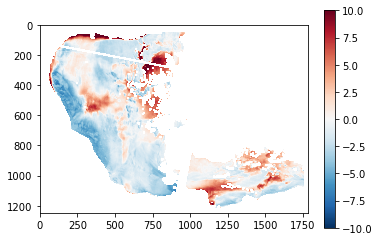

In [16]:
import matplotlib.colors as mcolors

error = depth-reference
error = error[850:2100,120:1900]
norm = mcolors.TwoSlopeNorm(vmin=-10, vmax = 10, vcenter=0)
pc = plt.imshow(error, norm=norm, cmap="RdBu_r")
plt.colorbar(pc)
#plt.show()

In [18]:
np.save('2_Ma_predictions.npy', depth)
np.save('2_Ma_error.npy', error)
np.save('2_Ma_reference.npy', reference)
df3.to_csv('2_Ma_dataframe.csv', index=False)


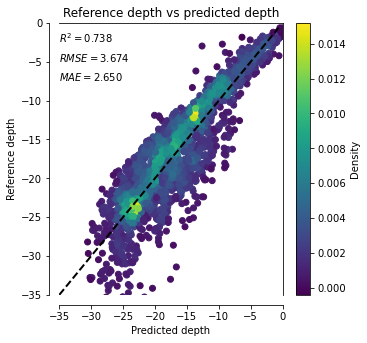

In [6]:
df3_sample = df3.sample(n = 2000)
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots(figsize=(5,5))
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)
    
    
    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.scatter(x, y, c=z, **kwargs )
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([-35,0])
    ax.set_ylim([-35,0])
    ax.set_xlabel("Predicted depth")
    ax.set_ylabel("Reference depth")
    ax.annotate("$R^2={:.3f}$".format(r2), (-35, -2.5))
    ax.annotate("$RMSE={:.3f}$".format(rmse), (-35, -5))
    ax.annotate("$MAE={:.3f}$".format(mae), (-35, -7.5))

    ax.plot([df3_sample['Reference'].min(), df3_sample['Reference'].max()], [df3_sample['Reference'].min(), df3_sample['Reference'].max()], "--k", linewidth=2)
    plt.title("Reference depth vs predicted depth")

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')
    plt.savefig('linear_regression.png', bbox_inches='tight', dpi=300)

    return ax

if "__main__" == __name__ :
    density_scatter(df3_sample['Depth'], df3_sample['Reference'], bins = [30,30])

# Ma 20 m

In [20]:
# Load data


# PRISMA image:
root_dir = 'C:/Users/david/Documents/ESW/ESW_thesis/Data/Puerto Rico/PRISMA/'
with rasterio.open(root_dir + 'PRISMA_mosaic_full.tif') as src:
    image = src.read()

# Zero depth spectrum:
root_dir = 'C:/Users/david/Documents/ESW/ESW_thesis/Data/Puerto Rico/Lidar_nieuw/'

with rasterio.open(root_dir + '0m_ref_v2.tif') as src:
    zero_depth = src.read()

image[image==0] = np.nan # set 0 to NaN
image_no_ref = image[0:-1,:,:] # select image without reference band
reference = image[-1,:,:] # select reference band
reference[reference > 0] = np.nan
reference[reference < - 20] = np.nan
#reference = reference[50:1450,100:1500]

# # Select area
# image_no_ref = image_no_ref[:,300:500,100:500]
# reference = reference[300:500,100:500]

# Adjust reference data
reference[reference > 0] = np.nan
reference[reference == 0] = np.nan
reference[reference < - 100] = np.nan

################ CALIBRATE ###############

# Select reflectance between 480 and 610 nm (Band 11 - 27):
image_no_ref = image_no_ref[10:26,]
zero_depth = zero_depth_hw[10:26,]

# Calculate parameters:
# Reflectance of band j, pixel i (Ri,j):
Rij = image_no_ref

# Mean reflectance zero depth (R0 mean):
R0_mean = zero_depth.mean()

# Mean reflectance all pixels (Ri mean):
Ri_mean = np.nanmean(image_no_ref, axis=0)

# 0 depth reflectance of band j (R0):
R0 = zero_depth

## Calculate CC:

CC = ((np.nansum(((Rij - Ri_mean) * (R0 - R0_mean)),axis=0)) / (np.sqrt((np.nansum(np.square(Rij - Ri_mean),axis=0)) * np.nansum(np.square(R0 - R0_mean),axis=0))))+1

# Calculate SC
SC = ((np.nansum((Rij * R0), axis = 0))/(np.sqrt(np.nansum(np.square(Rij),axis=0)) * np.sqrt(np.nansum(np.square(R0),axis=0))))+1


z = np.log(10*SC)/np.log(10*CC)


### CALIBRATE ####

# Calculate MAE
z_flatten = z.flatten() # Flatten Z values
df_z = pd.DataFrame(z_flatten) # Put Z values in dataframe
reference2 = reference.flatten() # Flatten reference lidar data
df_reference=pd.DataFrame(reference2) # Put reference data in dataframe
df = pd.concat([df_reference, df_z], axis=1) # Concatenate both dataframes
df2 = df.dropna() # Remove NaN values
df2.columns = ['Reference','Z']
df3 = df2.reset_index(drop=True)


bin1 = df3.loc[(df3['Reference']< 0) & (df3['Reference']> -2)]
bin1s = bin1.sample(n = 10)
bin2 = df3.loc[(df3['Reference']< -2) & (df3['Reference']> -4)]
bin2s = bin2.sample(n = 10)
bin3 = df3.loc[(df3['Reference']< -4) & (df3['Reference']> -6)]
bin3s = bin3.sample(n = 10)
bin4 = df3.loc[(df3['Reference']< -6) & (df3['Reference']> -8)]
bin4s = bin4.sample(n = 10)
bin5 = df3.loc[(df3['Reference']< -8) & (df3['Reference']> -10)]
bin5s = bin5.sample(n = 10)
bin6 = df3.loc[(df3['Reference']< -10) & (df3['Reference']> -12)]
bin6s = bin6.sample(n = 10)
bin7 = df3.loc[(df3['Reference']< -12) & (df3['Reference']> -14)]
bin7s = bin7.sample(n = 10)
bin8 = df3.loc[(df3['Reference']< -14) & (df3['Reference']> -16)]
bin8s = bin8.sample(n = 10)
bin9 = df3.loc[(df3['Reference']< -16) & (df3['Reference']> -18)]
bin9s = bin9.sample(n = 10)
bin10 = df3.loc[(df3['Reference']< -18) & (df3['Reference']> -20)]
bin10s = bin10.sample(n = 10)
# bin11 = df3.loc[(df3['Reference']< -20) & (df3['Reference']> -22)]
# bin11s = bin11.sample(n = 10)
#bin12 = df3.loc[(df3['Reference']< -22) & (df3['Reference']> -24)]
#bin12s = bin12.sample(n = 100)

df_sample = pd.concat([bin1s,bin2s,bin3s,bin4s,bin5s,bin6s,bin7s,bin8s,bin9s,bin10s])

# Linear regression to calculate k0 and k1:
model = sm.OLS(df_sample.Reference, sm.add_constant(df_sample.Z)).fit()
print_model = model.summary()
print(print_model)
# k1 = 135.1864
# k0 = -140.3520

df3['Depth'] = df3['Z'] * model.params[1] + model.params[0]
depth = z*model.params[1] + model.params[0]
df3['Depth'] = df3['Depth'][df3['Depth'] < 0]

df3['Reference'] = df3['Reference'][df3['Reference'] > -20]

df3 = df3.dropna()
df3['Error'] = df3['Depth'] - df3['Reference']
df3['Error_abs'] = np.abs(df3['Error'])
df3['Error_abs'].mean()

# Metrics
rmse = mean_squared_error(df3.Reference, df3.Depth, squared=False)
r2 = metrics.r2_score(df3.Reference, df3.Depth) 
mae = np.mean(abs(df3.Reference - df3.Depth))
print('MAE:',mae)
print('RMSE', rmse)
print('R2:',r2)

C:\Users\david\AppData\Local\Temp\ipykernel_17808\2349386202.py:45: RuntimeWarning: Mean of empty slice
  Ri_mean = np.nanmean(image_no_ref, axis=0)


                            OLS Regression Results                            
Dep. Variable:              Reference   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     611.4
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           6.51e-44
Time:                        20:07:14   Log-Likelihood:                -217.18
No. Observations:                 100   AIC:                             438.4
Df Residuals:                      98   BIC:                             443.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.3962      1.252     16.293      0.0

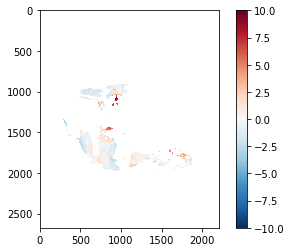

In [22]:
import matplotlib.colors as mcolors

error = depth-reference
norm = mcolors.TwoSlopeNorm(vmin=-10, vmax = 10, vcenter=0)
pc = plt.imshow(error, norm=norm, cmap="RdBu_r")
plt.colorbar(pc)
#plt.show()

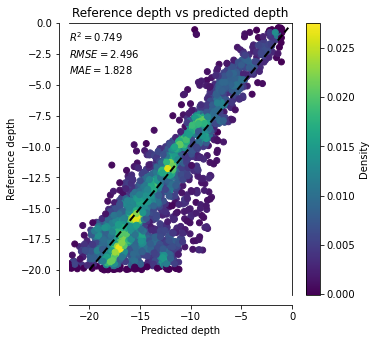

In [23]:
df3_sample = df3.sample(n = 2000)
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots(figsize=(5,5))
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)
    
    
    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.scatter(x, y, c=z, **kwargs )
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([-22,0])
    ax.set_ylim([-22,0])
    ax.set_xlabel("Predicted depth")
    ax.set_ylabel("Reference depth")
    ax.annotate("$R^2={:.3f}$".format(r2), (-22, -1.5))
    ax.annotate("$RMSE={:.3f}$".format(rmse), (-22, -2.8))
    ax.annotate("$MAE={:.3f}$".format(mae), (-22, -4.1))

    ax.plot([df3_sample['Reference'].min(), df3_sample['Reference'].max()], [df3_sample['Reference'].min(), df3_sample['Reference'].max()], "--k", linewidth=2)
    plt.title("Reference depth vs predicted depth")

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')
    plt.savefig('linear_regression.png', bbox_inches='tight', dpi=300)

    return ax

if "__main__" == __name__ :
    density_scatter(df3_sample['Depth'], df3_sample['Reference'], bins = [30,30])